In [88]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

/home/jose/.local/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/home/jose/.local/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


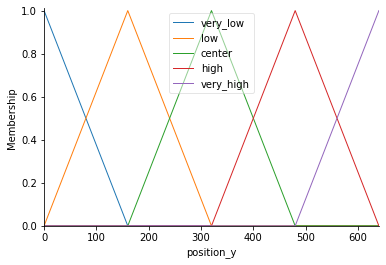

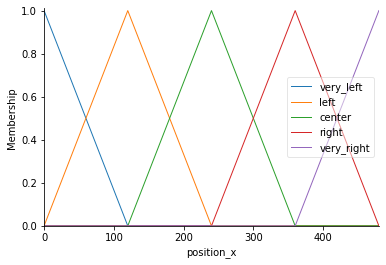

In [89]:
x = 480
y = 640

position_y = ctrl.Antecedent(np.arange(0,y+1,1), 'position_y')
position_x = ctrl.Antecedent(np.arange(0,x+1,1), 'position_x')

position_y['very_low'] = fuzz.trimf(position_y.universe, [0,0,y*0.25])
position_y['low'] = fuzz.trimf(position_y.universe, [0,0.25*y,0.5*y])
position_y['center'] = fuzz.trimf(position_y.universe, [0.25*y,0.5*y,0.75*y])
position_y['high'] = fuzz.trimf(position_y.universe, [0.5*y,0.75*y,y])
position_y['very_high'] = fuzz.trimf(position_y.universe, [0.75*y,y,y])

position_x['very_left'] = fuzz.trimf(position_x.universe, [0,0,x*0.25])
position_x['left'] = fuzz.trimf(position_x.universe, [0,0.25*x,0.5*x])
position_x['center'] = fuzz.trimf(position_x.universe, [0.25*x,0.5*x,0.75*x])
position_x['right'] = fuzz.trimf(position_x.universe, [0.5*x,0.75*x,x])
position_x['very_right'] = fuzz.trimf(position_x.universe, [0.75*x,x,x])

position_y.view()
position_x.view()

/home/jose/.local/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/home/jose/.local/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


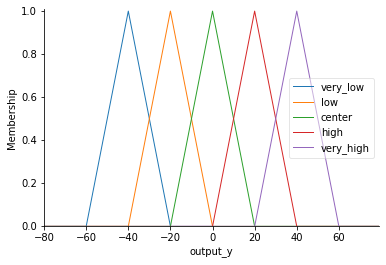

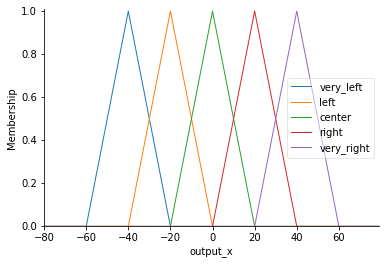

In [92]:
output_y = ctrl.Consequent(np.arange(-40,40, 1), 'output_y')
output_x = ctrl.Consequent(np.arange(-40,40, 1), 'output_x')

output_y['very_low'] = fuzz.trimf(output_y.universe,[-30,-20,-10])
output_y['low'] = fuzz.trimf(output_y.universe, [-20,-10,0])
output_y['center'] = fuzz.trimf(output_y.universe, [-10,0,10])
output_y['high'] = fuzz.trimf(output_y.universe,[0,10,20])
output_y['very_high'] = fuzz.trimf(output_y.universe,[10,20,30])

output_x['very_left'] = fuzz.trimf(output_x.universe, [-30,-20,-10])
output_x['left'] = fuzz.trimf(output_x.universe,  [-20,-10,0])
output_x['center'] = fuzz.trimf(output_x.universe, [-10,0,10])
output_x['right'] = fuzz.trimf(output_x.universe, [0,10,20])
output_x['very_right'] = fuzz.trimf(output_x.universe, [10,20,30])

output_y.view()
output_x.view()

In [93]:
y_str = ['very_low','low','center','high','very_high']
x_str = ['very_left','left','center','right','very_right']

rules = []

for i in range(5):
    for j in range(5):
        rules.append(ctrl.Rule(position_y[y_str[i]] & position_x[x_str[j]],consequent=[output_y[y_str[i]],output_x[x_str[j]]]))


In [94]:
print(rules)
position_ctrl = ctrl.ControlSystem(rules)


[IF position_y[very_low] AND position_x[very_left] THEN [output_y[very_low], output_x[very_left]]
	AND aggregation function : fmin
	OR aggregation function  : fmax, IF position_y[very_low] AND position_x[left] THEN [output_y[very_low], output_x[left]]
	AND aggregation function : fmin
	OR aggregation function  : fmax, IF position_y[very_low] AND position_x[center] THEN [output_y[very_low], output_x[center]]
	AND aggregation function : fmin
	OR aggregation function  : fmax, IF position_y[very_low] AND position_x[right] THEN [output_y[very_low], output_x[right]]
	AND aggregation function : fmin
	OR aggregation function  : fmax, IF position_y[very_low] AND position_x[very_right] THEN [output_y[very_low], output_x[very_right]]
	AND aggregation function : fmin
	OR aggregation function  : fmax, IF position_y[low] AND position_x[very_left] THEN [output_y[low], output_x[very_left]]
	AND aggregation function : fmin
	OR aggregation function  : fmax, IF position_y[low] AND position_x[left] THEN [o

3.2793666360846614
4.1493673629737975


/home/jose/.local/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/home/jose/.local/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


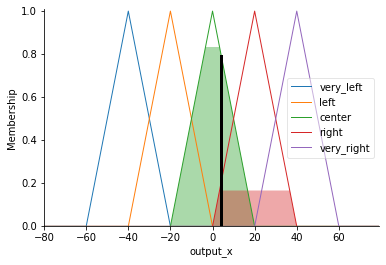

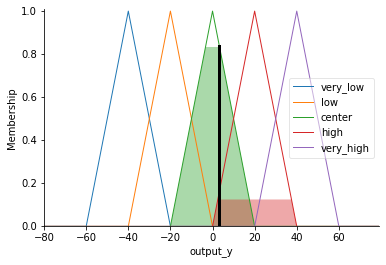

In [101]:
position = ctrl.ControlSystemSimulation(position_ctrl)

position.input['position_y'] = y-300
position.input['position_x'] = 260
position.compute()
print(position.output['output_y'])
print(position.output['output_x'])
output_x.view(sim=position)
output_y.view(sim=position)